## Outlier

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\moham\AppData\Local\Temp\ipykernel_10560\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = [0.2,3,5,6,7,4,2,4,20]

<Axes: >

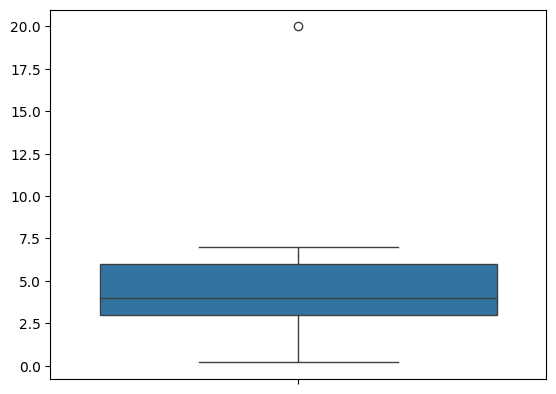

In [4]:
sns.boxplot(data)

In [5]:
np.mean(data)

5.688888888888889

## Removeing Outlier Using  Z-Score

In [6]:
data = pd.read_csv("./scholarship(1).csv")

In [7]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [8]:
df = data.copy()

<Axes: xlabel='semester_percentage', ylabel='Count'>

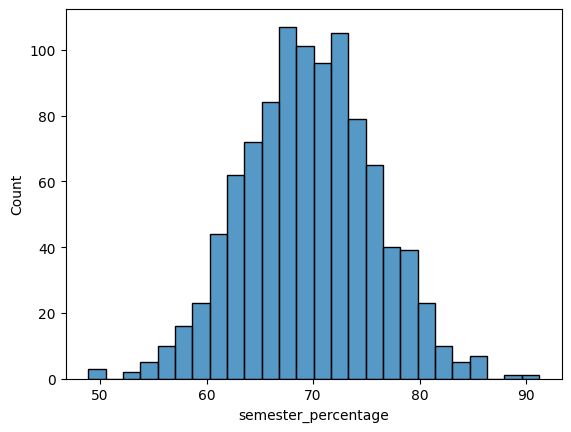

In [9]:
sns.histplot(df['semester_percentage'])

C:\Users\moham\AppData\Local\Temp\ipykernel_10560\3608376318.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['semester_percentage'])


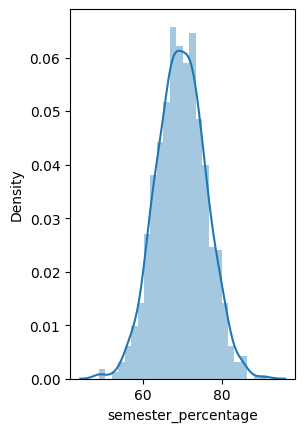

In [10]:
plt.subplot(1,2,1)
sns.distplot(df['semester_percentage'])
plt.show()

<Axes: ylabel='semester_percentage'>

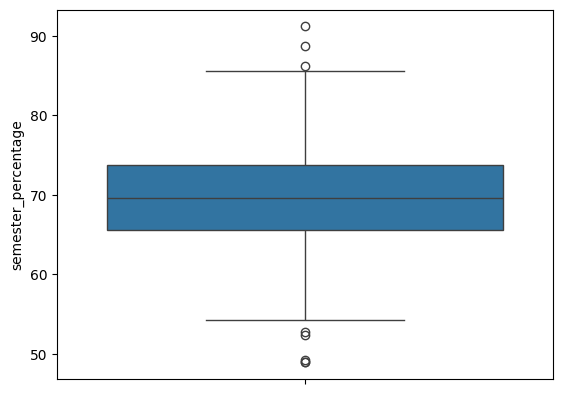

In [11]:
sns.boxplot(data['semester_percentage'])

In [12]:
mean = round(df['semester_percentage'].mean(),2)
std = round(df['semester_percentage'].std(),2)

In [13]:
mean, std

(69.61, 6.16)

In [14]:
df['semester_percentage'].describe()

count    1000.000000
mean       69.612400
std         6.158979
min        48.900000
25%        65.500000
50%        69.600000
75%        73.700000
max        91.200000
Name: semester_percentage, dtype: float64

In [15]:
high_val = mean + 3*std
low_val = mean - 3*std

In [16]:
high_val, low_val

(88.09, 51.129999999999995)

In [17]:
df[(df['semester_percentage'] < low_val) | (df['semester_percentage']>high_val)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


## Trimming

In [18]:
df[(df['semester_percentage'] > low_val) & (df['semester_percentage']<high_val)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


## Z - Score

In [19]:
df['z_Score'] = (df['semester_percentage']-df['semester_percentage'].mean())/df['semester_percentage'].std()

In [20]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_Score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [21]:
df['z_Score']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: z_Score, Length: 1000, dtype: float64

In [22]:
df[(df['z_Score']<-3) | (df['z_Score']>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_Score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [23]:
df[(df['z_Score']>-3) & (df['z_Score']<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_Score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


## Capping

In [24]:
df[(df['z_Score']<-3) | (df['z_Score']>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_Score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [25]:
upper_limit  = mean + 3*std
lower_limit = mean - 3*std

In [26]:
df['semester_percentage'] = np.where(df['semester_percentage'] > upper_limit, upper_limit,np.where(df['semester_percentage'] < lower_limit, lower_limit, df['semester_percentage']) )

In [27]:
df[(df['z_Score']<-3) | df['semester_percentage']>3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_Score


In [28]:
df[(df['semester_percentage']<low_val) | (df['semester_percentage']>high_val)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_Score


## Test

In [29]:
df2 = data.copy()

In [30]:
df2.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [31]:
df2.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


C:\Users\moham\AppData\Local\Temp\ipykernel_10560\3716526848.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['semester_percentage'])


<Axes: xlabel='semester_percentage', ylabel='Density'>

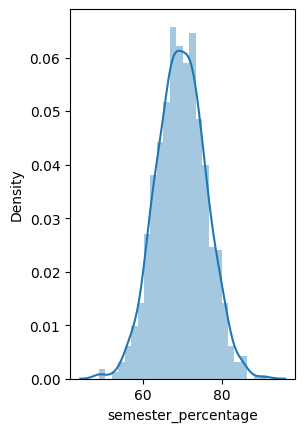

In [32]:
plt.subplot(1,2,2)
sns.distplot(df2['semester_percentage'])

In [33]:
mean1 = round(df2['semester_percentage'].mean())
std1 = round(df2['semester_percentage'].std())

In [34]:
higher_limit = mean + 3*std
lower_limit = mean - 3*std
higher_limit,lower_limit

(88.09, 51.129999999999995)

In [35]:
df2[(df2['semester_percentage']<lower_limit) | (df2['semester_percentage']>higher_limit)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [36]:
df2[(df2['semester_percentage']>lower_limit) & (df2['semester_percentage']<higher_limit)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [37]:
df2['z_score'] = (df['semester_percentage'] - df['semester_percentage'].mean())/df['semester_percentage'].std()

In [38]:
df2

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.372948
1,74.6,38,1,0.813625
2,75.4,40,1,0.944196
3,64.2,8,1,-0.883797
4,72.3,17,0,0.438234
...,...,...,...,...
995,88.7,44,1,3.015378
996,91.2,65,1,3.015378
997,48.9,34,0,-3.017000
998,86.2,46,1,2.706904


In [39]:
df2[(df2['z_score'] < -3) | (df2['z_score']>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.017000
995,88.7,44,1,3.015378
996,91.2,65,1,3.015378
997,48.9,34,0,-3.017000
999,49.0,10,1,-3.017000


In [40]:
df2['semester_percentage'] = np.where(df2['semester_percentage']>higher_limit,higher_limit,np.where(df2['semester_percentage']<lower_limit,lower_limit,df2['semester_percentage']))

In [41]:
df2

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.90,26,1,0.372948
1,74.60,38,1,0.813625
2,75.40,40,1,0.944196
3,64.20,8,1,-0.883797
4,72.30,17,0,0.438234
...,...,...,...,...
995,88.09,44,1,3.015378
996,88.09,65,1,3.015378
997,51.13,34,0,-3.017000
998,86.20,46,1,2.706904


In [42]:
df2[(df2['semester_percentage'] > higher_limit) | (df2['semester_percentage']<lower_limit)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
